In [19]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
import cProfile
sns.set()

# Zadanie 1

## Na jednym wykresie

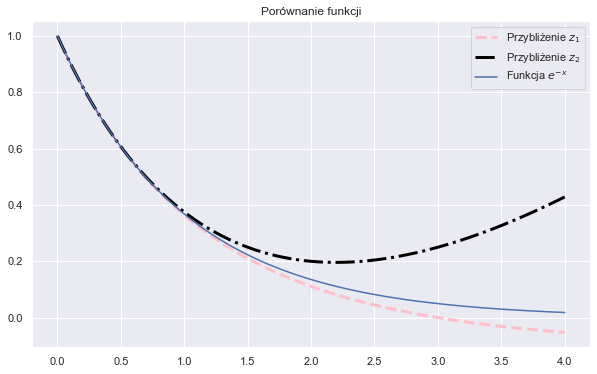

In [20]:
x=np.linspace(0,4,300)
z1=(6-2*x)/(6+4*x+x**2)
z2=(6-4*x+x**2)/(6+2*x)
f=np.exp(-x)

plt.figure(figsize=(10,6))
plt.plot(x,z1, label=r'Przybliżenie $z_1$', linestyle='--', linewidth=3, color='pink')
plt.plot(x,z2, label=r'Przybliżenie $z_2$', linestyle='-.', linewidth=3, color='black')
plt.plot(x,f, label=r'Funkcja $e^{-x}$')
plt.title("Porównanie funkcji")
plt.legend()
plt.savefig('na_jednym_wykresie.png')

## Tryb wielowymiarowy

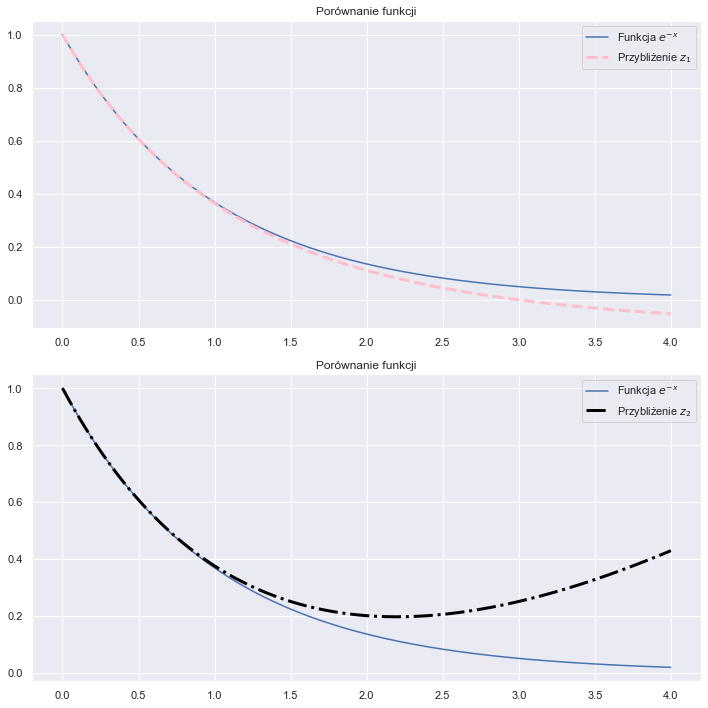

In [21]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(x,f,label=r'Funkcja $e^{-x}$')
ax[0].plot(x,z1,label=r'Przybliżenie $z_1$', linestyle='--', linewidth=3, color='pink')
ax[0].set_title("Porównanie funkcji")
ax[0].legend()

ax[1].plot(x,f,label=r'Funkcja $e^{-x}$')
ax[1].plot(x,z2,label=r'Przybliżenie $z_2$', linestyle='-.', linewidth=3, color='black')
ax[1].set_title("Porównanie funkcji")
ax[1].legend()

plt.tight_layout()
plt.savefig('tryb_wielowymiarowy.png')

## Błędy

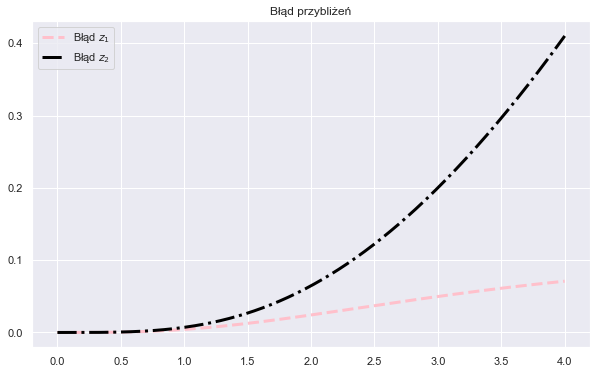

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x,np.abs(f-z1), label=r'Błąd $z_1$', linestyle='--', linewidth=3, color='pink')
plt.plot(x,np.abs(f-z2), label=r'Błąd $z_2$', linestyle='-.', linewidth=3, color='black')
plt.legend()
plt.title("Błąd przybliżeń")
plt.savefig('bledy.png')

Wniosek - widać, że na początku błąd przybliżeń jest mały, natomiast dla $z_2$ już przy punkcie $x=4$ błąd wynosi ok. $0.4$, a dla $z_1$ błąd wynosi około $0.8$, co może oznaczać, że lepszym przybliżeniem jest funkcja $z_1$

# Zadanie 2

Epsilon maszynowy (dokładność maszynowa) to największa liczba nieujemna, która po dodaniu do jedność daje wyniki równy jeden, czyli $1+\epsilon=1$

In [23]:
def find_epsilon():
    epsilon=1.0
    while 1.0+epsilon>1.0:
        epsilon /= 2
    return epsilon*2

In [24]:
find_epsilon()

2.220446049250313e-16

Najmniejszy możliwy $\epsilon$ wynosi $1.1102230246251565 \cdot 10^{-16}$.

# Zadanie 3

In [25]:
7/100*100-7

8.881784197001252e-16

In [26]:
lista=[]
for i in range(1,51):
    licz=i/100*100-i
    if licz != 0.0:
        lista.append(i)

In [27]:
lista

[7, 14, 28, 29]

Liczby, które są również podatne na błąd tego typu to $7,14,28,29$. Przyczyną błędu jest reprezentacja liczb zmiennopozycyjnych, nie wszystkie z nich mają dokładną reprezentację binarną.

# Zadanie 4

In [28]:
def ieee(sign,exponent,fraction):
    decoding_exponent=int(exponent,2)-127

    fraction_value=0
    for i, bit in enumerate(fraction):
        if bit=='1':
            fraction_value += 2**(-i-1)
    
    ieee_value=(-1)**int(sign)*(1+fraction_value)*2**decoding_exponent
    
    return ieee_value

In [29]:
sign="0"
exponent="01111111"
fraction="10110011001100110011001"

value=ieee(sign,exponent,fraction)

In [30]:
value

1.6999999284744263

# Błąd bezwzględny

In [31]:
np.abs(value-1.7)

7.152557368605983e-08

# Błąd względny

In [32]:
np.abs(value-1.7)/(1.7)

4.2073866874152845e-08

# Zadanie 5

In [33]:
def wielomian(x):
    return 6*x**4+5*x**3-13*x**2+x+1

In [34]:
def values():
    x_wielomian=np.arange(-10,10.0001,0.0001)
    lista_zer=np.zeros(len(x_wielomian))

    for i in range(len(x_wielomian)):
        lista_zer[i]=wielomian(x_wielomian[i])
        
    return lista_zer

In [35]:
cProfile.run("values()")

         200009 function calls in 0.454 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.087    0.087    0.454    0.454 2786532362.py:1(values)
   200001    0.366    0.000    0.366    0.000 789832696.py:1(wielomian)
        1    0.000    0.000    0.454    0.454 <string>:1(<module>)
        1    0.000    0.000    0.454    0.454 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




# Zadanie 6

In [36]:
def horner(x):
    return x*(x*(x*(6*x+5)-13)+1)+1

In [37]:
def values_horner():
    x_wielomian=np.arange(-10,10.0001,0.0001)
    lista_zer=np.zeros(len(x_wielomian))

    for i in range(len(x_wielomian)):
        lista_zer[i]=horner(x_wielomian[i])
        
    return lista_zer

In [38]:
cProfile.run("values_horner()")

         200009 function calls in 0.355 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.076    0.076    0.355    0.355 3643998097.py:1(values_horner)
   200001    0.279    0.000    0.279    0.000 3858256074.py:1(horner)
        1    0.000    0.000    0.355    0.355 <string>:1(<module>)
        1    0.000    0.000    0.355    0.355 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




Wniosek po zadaniu 5. i 6. jest taki, że faktycznie schmeat Hornera jest bardziej ekonomiczna metodą (szybszą).